<a href="https://colab.research.google.com/github/felixyuzhenyang/MSSP-6070-YuzhenYang/blob/main/Participation_Activity_Week_13_YuzhenYang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# !rm -rf /content/*

In [42]:
!pip install yfinance --upgrade --no-cache-dir

import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [43]:
"""
from google.colab import userdata
import os
os.chdir('/content')
github_token = userdata.get('GitHub_MSSP6070')
owner = 'felixyuzhenyang'
repository = 'MSSP-6070-YuzhenYang'

clone_url = f'https://{github_token}@github.com/{owner}/{repository}.git'

!git clone {clone_url}
"""

"\nfrom google.colab import userdata\nimport os\nos.chdir('/content')\ngithub_token = userdata.get('GitHub_MSSP6070')\nowner = 'felixyuzhenyang'\nrepository = 'MSSP-6070-YuzhenYang'\n\nclone_url = f'https://{github_token}@github.com/{owner}/{repository}.git'\n\n!git clone {clone_url}\n"

In [44]:
tickers = ["AAPL", "META", "GOOGL", "NFLX"]
start_date = "2023-01-01"
end_date   = None

# Task 1

In [45]:
stock_dfs = {}

for t in tickers:
    print(f"Downloading data for {t} ...")
    df_t = yf.download(t, start=start_date, end=end_date)
    if isinstance(df_t.columns, pd.MultiIndex):
        df_t.columns = df_t.columns.get_level_values(0)
    # ------------------

    df_t["Ticker"] = t
    stock_dfs[t] = df_t

/tmp/ipython-input-3811978910.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_t = yf.download(t, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3811978910.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_t = yf.download(t, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3811978910.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_t = yf.download(t, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3811978910.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_t = yf.download(t, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


# Task 2

In [46]:
combined_df = pd.concat(stock_dfs.values())
combined_df = combined_df.reset_index().rename(columns={"index": "Date"})
combined_df["Date"] = pd.to_datetime(combined_df["Date"])

print("Combined df shape:", combined_df.shape)
print(combined_df.head())

Combined df shape: (2924, 7)
Price       Date       Close        High         Low        Open     Volume  \
0     2023-01-03  123.211205  128.954553  122.324579  128.343772  112117500   
1     2023-01-04  124.482040  126.747861  123.221065  125.004162   89113600   
2     2023-01-05  123.161949  125.871079  122.905819  125.240591   80962700   
3     2023-01-06  127.693573  128.353614  123.033875  124.137232   87754700   
4     2023-01-09  128.215698  131.427258  127.959568  128.530950   70790800   

Price Ticker  
0       AAPL  
1       AAPL  
2       AAPL  
3       AAPL  
4       AAPL  


# Task 3

In [47]:
metrics = [
    "quickRatio",
    "currentRatio",
    "totalRevenue",
    "debtToEquity",
    "revenuePerShare",
    "returnOnAssets",
    "returnOnEquity",
    "grossProfits",
]

metrics_rows = []

for t in tickers:
    ticker_obj = yf.Ticker(t)
    info = ticker_obj.info

    row = {"Ticker": t}
    for m in metrics:
        row[m] = info.get(m, np.nan)
    metrics_rows.append(row)

metrics_df = pd.DataFrame(metrics_rows).set_index("Ticker")
print("\nFundamental metrics table:")
print(metrics_df)


Fundamental metrics table:
        quickRatio  currentRatio  totalRevenue  debtToEquity  revenuePerShare  \
Ticker                                                                          
AAPL         0.771         0.893  416161005568       152.411           27.840   
META         1.671         1.978  189458006016        26.311           75.122   
GOOGL        1.563         1.747  385476001792        11.424           31.714   
NFLX         1.132         1.332   43378786304        65.822           10.179   

        returnOnAssets  returnOnEquity  grossProfits  
Ticker                                                
AAPL           0.22964         1.71422  195201007616  
META           0.18013         0.32643  155381006336  
GOOGL          0.16276         0.35450  228095000576  
NFLX           0.14740         0.42861   20858714112  


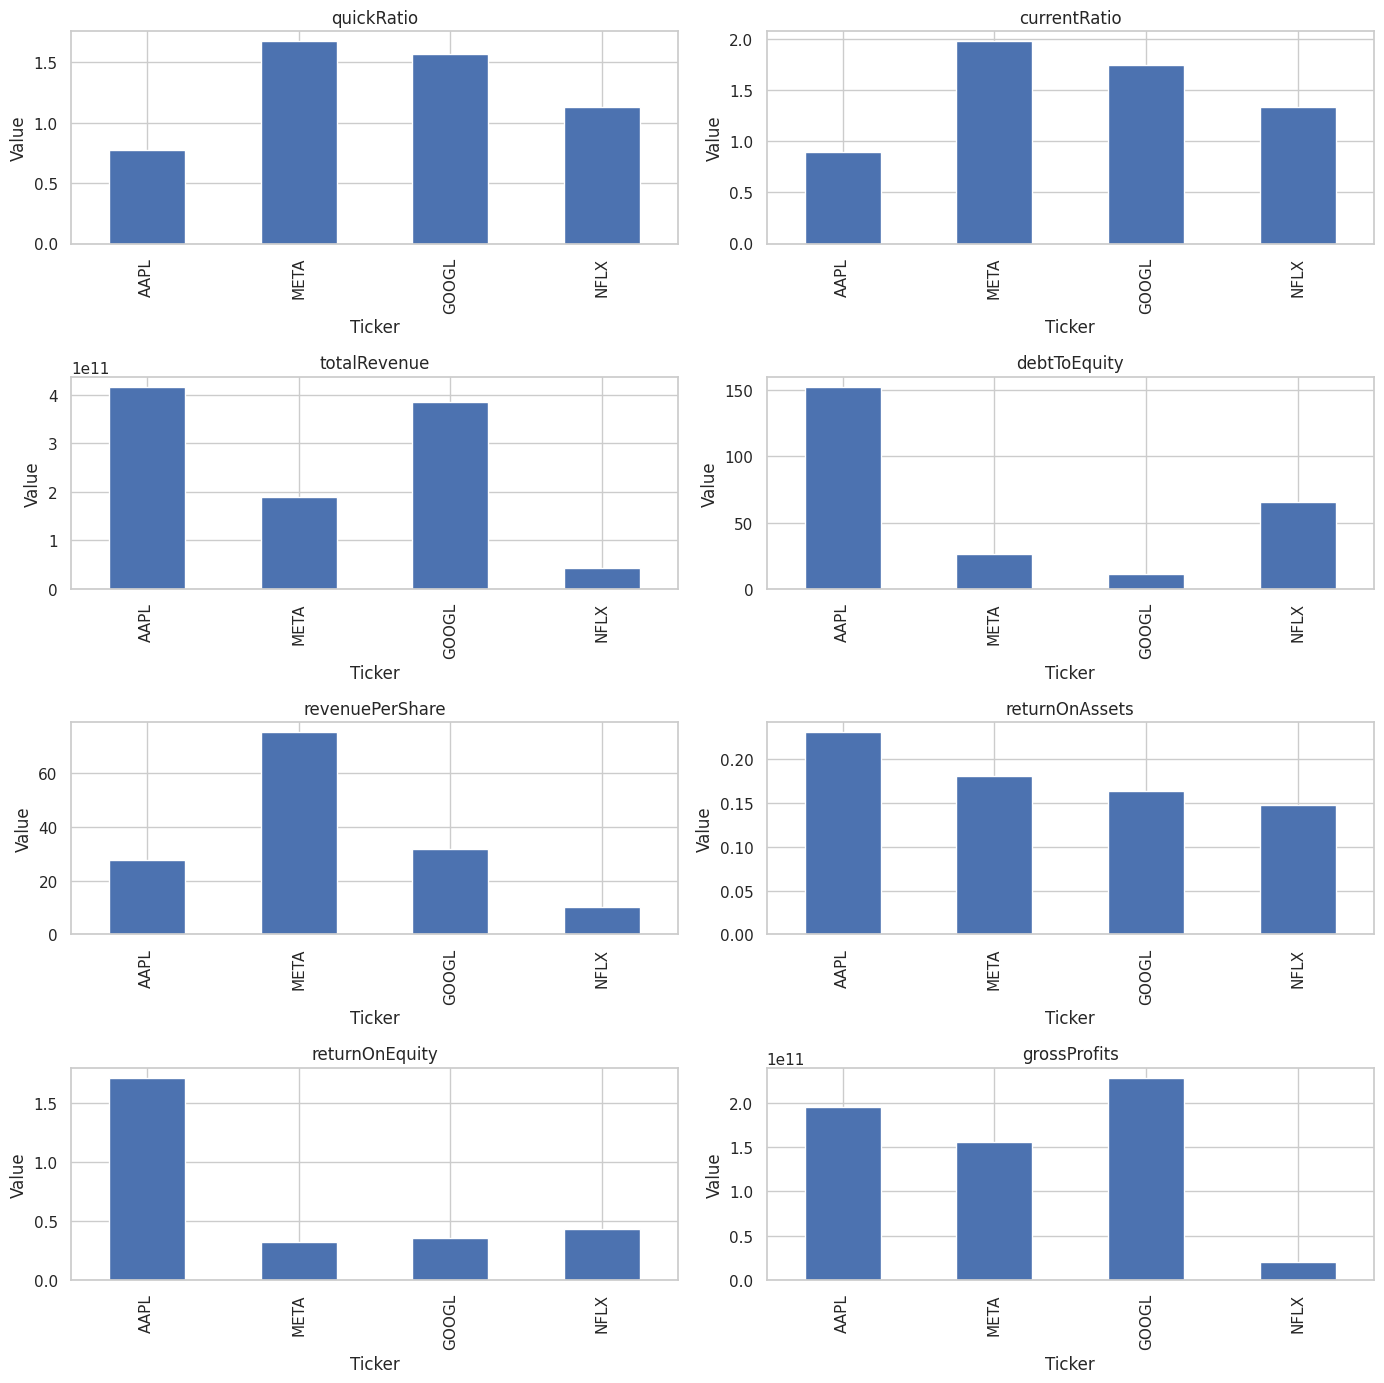

In [48]:
num_metrics = len(metrics)
fig, axes = plt.subplots(4, 2, figsize=(14, 14))
axes = axes.flatten()

for i, m in enumerate(metrics):
    metrics_df[m].plot(kind="bar", ax=axes[i])
    axes[i].set_title(m)
    axes[i].set_xlabel("Ticker")
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()


# Task 4

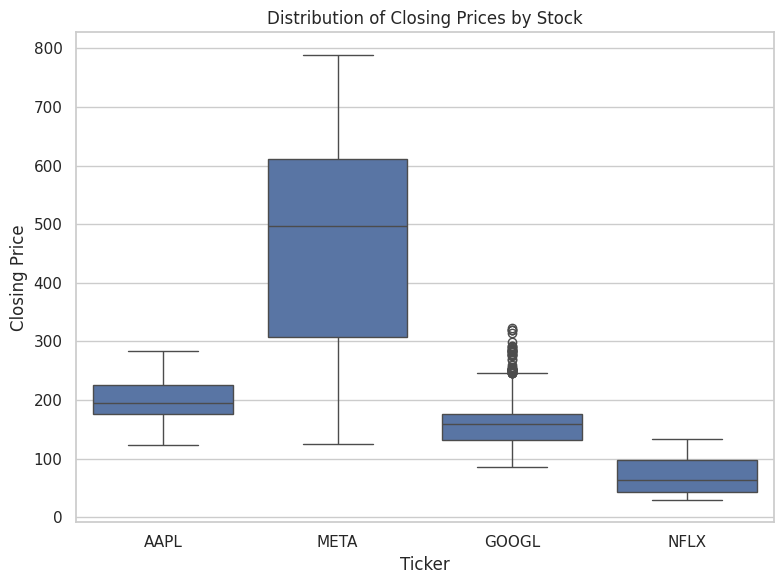

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x="Ticker", y="Close")
plt.title("Distribution of Closing Prices by Stock")
plt.xlabel("Ticker")
plt.ylabel("Closing Price")
plt.tight_layout()
plt.show()

# Task 5


Data for 2023 sample:
Price       Date       Close        High         Low        Open     Volume  \
0     2023-01-03  123.211205  128.954553  122.324579  128.343772  112117500   
1     2023-01-04  124.482040  126.747861  123.221065  125.004162   89113600   
2     2023-01-05  123.161949  125.871079  122.905819  125.240591   80962700   
3     2023-01-06  127.693573  128.353614  123.033875  124.137232   87754700   
4     2023-01-09  128.215698  131.427258  127.959568  128.530950   70790800   

Price Ticker  
0       AAPL  
1       AAPL  
2       AAPL  
3       AAPL  
4       AAPL  


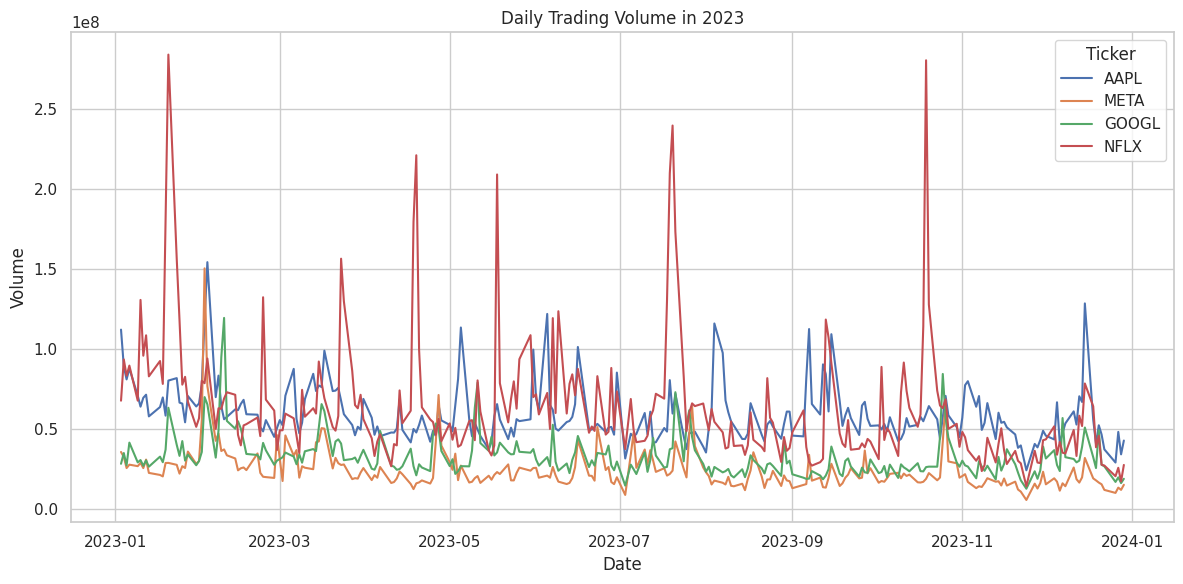

In [50]:
mask_2023 = (combined_df["Date"] >= "2023-01-01") & (combined_df["Date"] <= "2023-12-31")
df_2023 = combined_df[mask_2023].copy()

print("\nData for 2023 sample:")
print(df_2023.head())

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_2023, x="Date", y="Volume", hue="Ticker")
plt.title("Daily Trading Volume in 2023")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend(title="Ticker")
plt.tight_layout()
plt.show()


# Task 6

In [51]:
from google.colab import files

file_name = 'combined_stock_data.csv'

combined_df.to_csv(file_name, index=False)

print(f"File saved as: {file_name}")
files.download(file_name)

File saved as: combined_stock_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>